In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering.k_means import Kmeans

In [18]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


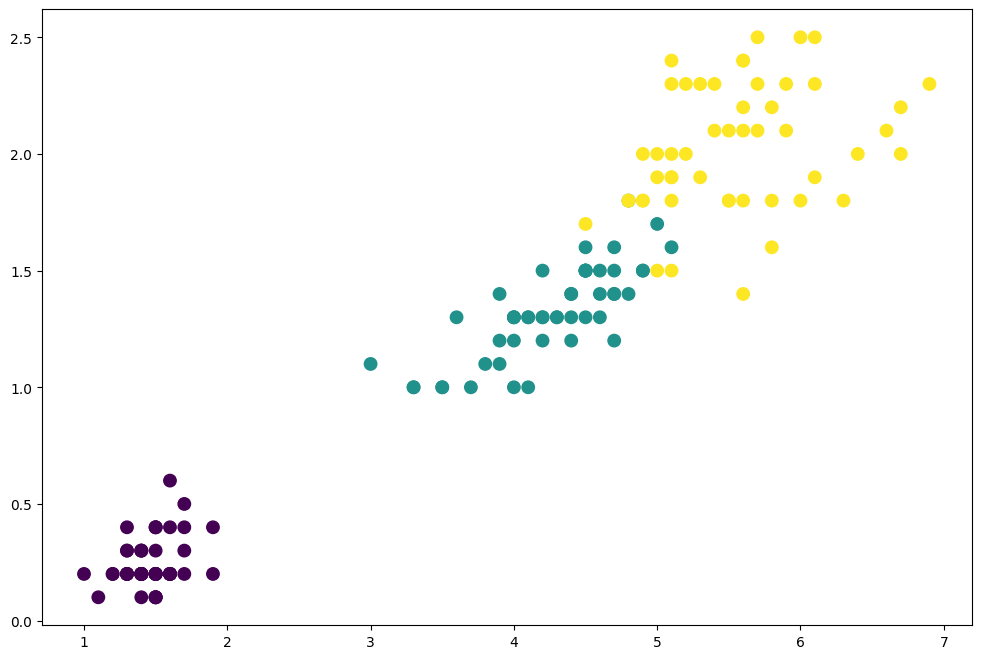

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [21]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [22]:
model= Kmeans(n_centroids=3)
model.train(X,history_train=True)

Iter: 1 	 ==================================================> 	 moviment: 0.407
Iter: 2 	 ==================================================> 	 moviment: 0.200
Iter: 3 	 ==================================================> 	 moviment: 0.070
Iter: 4 	 ==================================================> 	 moviment: 0.029
Iter: 5 	 ==================================================> 	 moviment: 0.043
Iter: 6 	 ==================================================> 	 moviment: 0.015
Iter: 7 	 ==================================================> 	 moviment: 0.000


In [23]:
model


        model: Kmeans 

        n_centroids: 3 

        

In [24]:
pred_labels = model.predict(X)

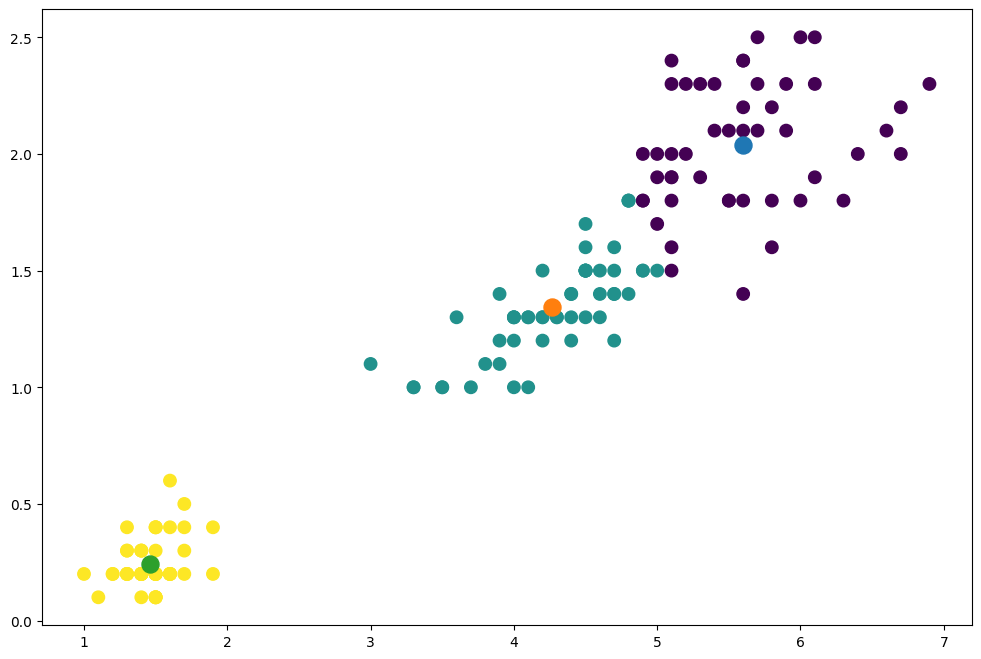

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [26]:
history=model.history_train
history

{0: array([[4.9, 2. , 4.9, 2. ],
        [3.7, 1. , 3.7, 1. ],
        [1.3, 0.2, 1.3, 0.2]]),
 1: array([[5.26986301, 1.85342466, 5.26986301, 1.85342466],
        [3.92222222, 1.1962963 , 3.92222222, 1.1962963 ],
        [1.464     , 0.244     , 1.464     , 0.244     ]]),
 2: array([[5.44745763, 1.94915254, 5.44745763, 1.94915254],
        [4.12682927, 1.28292683, 4.12682927, 1.28292683],
        [1.464     , 0.244     , 1.464     , 0.244     ]]),
 3: array([[5.51481481, 1.99444444, 5.51481481, 1.99444444],
        [4.19130435, 1.30217391, 4.19130435, 1.30217391],
        [1.464     , 0.244     , 1.464     , 0.244     ]]),
 4: array([[5.53846154, 2.01346154, 5.53846154, 2.01346154],
        [4.22083333, 1.31041667, 4.22083333, 1.31041667],
        [1.464     , 0.244     , 1.464     , 0.244     ]]),
 5: array([[5.58367347, 2.02653061, 5.58367347, 2.02653061],
        [4.25490196, 1.33921569, 4.25490196, 1.33921569],
        [1.464     , 0.244     , 1.464     , 0.244     ]]),
 6: array(

# Kmeans Animation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.centroids = history[i]
    pred_labels = model.predict(X)
    ax.scatter(data['PetalLengthCm'], data['PetalWidthCm'], s=80, c=pred_labels)

    for centroid in model.centroids:
        ax.scatter(centroid[0], centroid[1], s=150)


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history), repeat=False)
# Display the animation
HTML(ani.to_jshtml())

In [28]:
model.get_distances(X)

array([[6.47787367, 4.36745969, 0.10983624],
       [6.47787367, 4.36745969, 0.10983624],
       [6.60766075, 4.49915508, 0.2401333 ],
       [6.34858361, 4.23639137, 0.080399  ],
       [6.47787367, 4.36745969, 0.10983624],
       [5.97644102, 3.87011383, 0.40007999],
       [6.42244869, 4.31714965, 0.12026637],
       [6.34858361, 4.23639137, 0.080399  ],
       [6.47787367, 4.36745969, 0.10983624],
       [6.40776981, 4.29231114, 0.20991427],
       [6.34858361, 4.23639137, 0.080399  ],
       [6.21982159, 4.10601017, 0.20214846],
       [6.53588917, 4.4217222 , 0.22285421],
       [6.9233552 , 4.81401123, 0.55359191],
       [6.73791614, 4.63142405, 0.37850231],
       [6.23814988, 4.13680622, 0.22641555],
       [6.50162907, 4.40551362, 0.32009998],
       [6.42244869, 4.31714965, 0.12026637],
       [6.03264844, 3.92105906, 0.34302187],
       [6.29201986, 4.1845058 , 0.09414882],
       [6.09162107, 3.97638369, 0.33950552],
       [6.23814988, 4.13680622, 0.22641555],
       [6.

In [29]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.train(X, history_train=False)
    inertias.append(model.get_inertia(X))

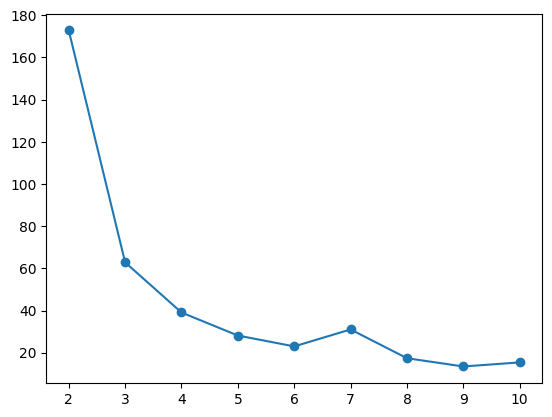

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')